## Data Exploration for Online Retail II Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/online_retail_II.csv", sep=",")

In [3]:
df.head

<bound method NDFrame.head of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [7]:
for col in df.columns:
    print(f"'{col}': {df[col].unique()}")

'Invoice': ['489434' '489435' '489436' ... '581585' '581586' '581587']
'StockCode': ['85048' '79323P' '79323W' ... '23609' '23617' '23843']
'Description': ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
'Quantity': [    12     48     24 ...    698  80995 -80995]
'InvoiceDate': ['2009-12-01 07:45:00' '2009-12-01 07:46:00' '2009-12-01 09:06:00' ...
 '2011-12-09 12:31:00' '2011-12-09 12:49:00' '2011-12-09 12:50:00']
'Price': [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]
'Customer ID': [13085. 13078. 15362. ... 15520. 13298. 12713.]
'Country': ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' '

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
def clean_retail_data(df: pd.DataFrame) -> pd.DataFrame:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df = df.dropna(subset=['Customer ID'])
    df['Description'] = df['Description'].fillna("No Description")

    return df

In [10]:
df = clean_retail_data(df)

C:\Users\ariho\AppData\Local\Temp\ipykernel_13532\4209273690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].fillna("No Description")


In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
# cancelled orders
df.loc[df['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
df.loc[df['Quantity'] < -80000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [14]:
df.loc[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [15]:
df.loc[(df['Invoice'] == '489529')&(df['Description'] == 'PENNY FARTHING BIRTHDAY CARD')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
634,489529,22028,PENNY FARTHING BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom
657,489529,22028,PENNY FARTHING BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom


In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(797885, 8)

In [18]:
df[df['StockCode'].str.contains('TEST', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom
89084,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103.0,United Kingdom


In [19]:
df[df['StockCode'].str.contains('BANK CHARGES', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.000,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.000,16805.0,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.000,16928.0,United Kingdom
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.000,17539.0,United Kingdom
149063,C503571,BANK CHARGES,Bank Charges,-1,2010-04-01 15:45:00,15.000,17539.0,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.000,12843.0,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.000,17448.0,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.000,17448.0,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.000,17448.0,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.000,17032.0,United Kingdom


In [20]:
EXCLUDE_CODES = ['TEST', 'BANK CHARGES', 'POST', 'D', 'DOT', 'CRUK', 'M']
df = df[~df['StockCode'].astype(str).isin(EXCLUDE_CODES)]

In [21]:
df = df.loc[df['Price'] > 0]

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

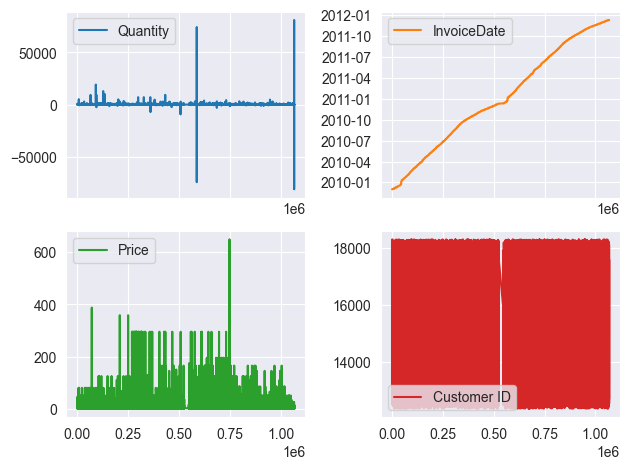

In [23]:
df.plot(subplots=True, layout=(2,2))

plt.tight_layout()
plt.show()

In [24]:
df.loc[df['Price']>300]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71038,495755,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:29:00,342.80,14413.0,United Kingdom
71082,495802,ADJUST,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:28:00,387.54,12748.0,United Kingdom
208669,C509473,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:12:00,300.13,17050.0,United Kingdom
208671,C509475,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,358.47,17364.0,United Kingdom
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.0,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.0,United Kingdom
748132,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom
748143,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom


In [25]:
df.loc[df['Quantity']>20000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


We detect "ADJUST", "ADJUST2" stock codes to delete as well.